Obtain metrics for RNASeq techniques:

- Coverage: Mean of pb (pair of bases) per sample. % of length of total transcripts (total transcript length pb from: https://www.gencodegenes.org/human/release_47.html).

- Sequencing depth: mean of reads including an unique nucleotide.

- Number of reads: total-length/mean-length (per sample)

- Read quality: Quality score per sequence. Calculate average per sample and total average. 

Obtain the metrics using all the fastq samples of the Premom clinical trial. 


Provide the information with averages and per samples in a CSV file.

# Imports

In [1]:
import yaml
import os
import sys

In [2]:
from src.utils.RNAseq_utils.RNAseq_utils_coverage import aggregate_runs_coverage
from src.utils.RNAseq_utils.RNAseq_utils_sequence_depth import aggregate_runs_sequencing_depth
from src.utils.RNAseq_utils.RNAseq_utils_quality_reads import aggregate_runs_quality_reads
from src.utils.RNAseq_utils.RNAseq_utils_number_reads import aggregate_runs_number_reads 

from src.utils.RNAseq_utils.RNAseq_utils import (assign_group,
                                                 calculate_total_transcript_length,
                                                 plot_results)

In [3]:
# Load the YAML file
with open('../../../config/patients/patients.yml', 'r') as file:
    samples_config = yaml.safe_load(file)

# Access data
lope_samples = samples_config['samples']['LOPE_samples']
eope_samples = samples_config['samples']['EOPE_samples']
control_samples = samples_config['samples']['control_samples']

In [4]:
base_dir = "../../../input/RNAseq_statistics/"

# Code

### Compute total transcript lenght

In [5]:
# GTF file 
gtf_file = base_dir + "gencode.v47.annotation.gtf"

total_transcript_length = calculate_total_transcript_length(gtf_file)

/home/dferri/ipremom/model/v45/tg-cfrna-modeling-totrna/src/utils/RNAseq_utils/RNAseq_utils.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts["length"] = transcripts["end"] - transcripts["start"] + 1


Total transcript length: 15064238905 bp


In [6]:
total_transcript_length

15064238905

### Coverage

Coverage represents how many times each base in the transcriptome is sequenced on average. It provides an estimate of the sequencing depth across the entire transcriptome.

**Formula:**

Coverage = ((Total Sequences × Sequence Length ) × 100) / Total Transcriptome Length
 
- Total Sequences: The total number of reads in the sample.

- Sequence Length: The average or median length of the reads.

- Total Transcriptome Length: The total length of all annotated transcripts in the reference genome.


**Good vs. Bad Data:**

- Good: when higher is the coverage, it ensures that most regions of the transcriptome are adequately sequenced, reducing the chance of missing important features.

- Bad: A low coverage might indicate insufficient sequencing depth, leading to incomplete or biased transcriptome representation.

In [7]:
# all runs
result_all_runs = aggregate_runs_coverage(base_dir, process_all=True)
result_all_runs = assign_group(dataframe=result_all_runs, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
result_all_runs

Processing runs: 100%|██████████| 28/28 [00:10<00:00,  2.78it/s]


,Sample Base,Average Mean Coverage,Sample,Group
0,C02-P0013-T1,1.989173,"C02-P0013-T1_S9_L003, C02-P0013-T1_S9_L001, C0...",Control
1,C02-P0013-T2,2.565033,"C02-P0013-T2_S11_L001, C02-P0013-T2_S11_L002, ...",Control
2,C02-P0013-T3,2.645310,"C02-P0013-T3_S13_L001, C02-P0013-T3_S13_L004, ...",Control
3,C02-P0016-T1,3.461292,"C02-P0016-T1_S1_L001, C02-P0016-T1_S1_L004, C0...",LOPE
4,C02-P0016-T2,2.931993,"C02-P0016-T2_S4_L001, C02-P0016-T2_S4_L003, C0...",LOPE
...,...,...,...,...
490,C21-P0890-T2,3.446322,"C21-P0890-T2_S15_L002, C21-P0890-T2_S15_L001, ...",EOPE
491,C21-P0962-T1,3.016388,"C21-P0962-T1_S17_L003, C21-P0962-T1_S17_L001, ...",EOPE
492,C21-P0962-T2,2.685598,"C21-P0962-T2_S18_L002, C21-P0962-T2_S18_L003, ...",EOPE
493,C21-P1237-T1,2.476183,"C21-P1237-T1_S8_L001, C21-P1237-T1_S8_L003, C2...",LOPE


/home/dferri/ipremom/model/v45/tg-cfrna-modeling-totrna/src/utils/RNAseq_utils/RNAseq_utils.py:133: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


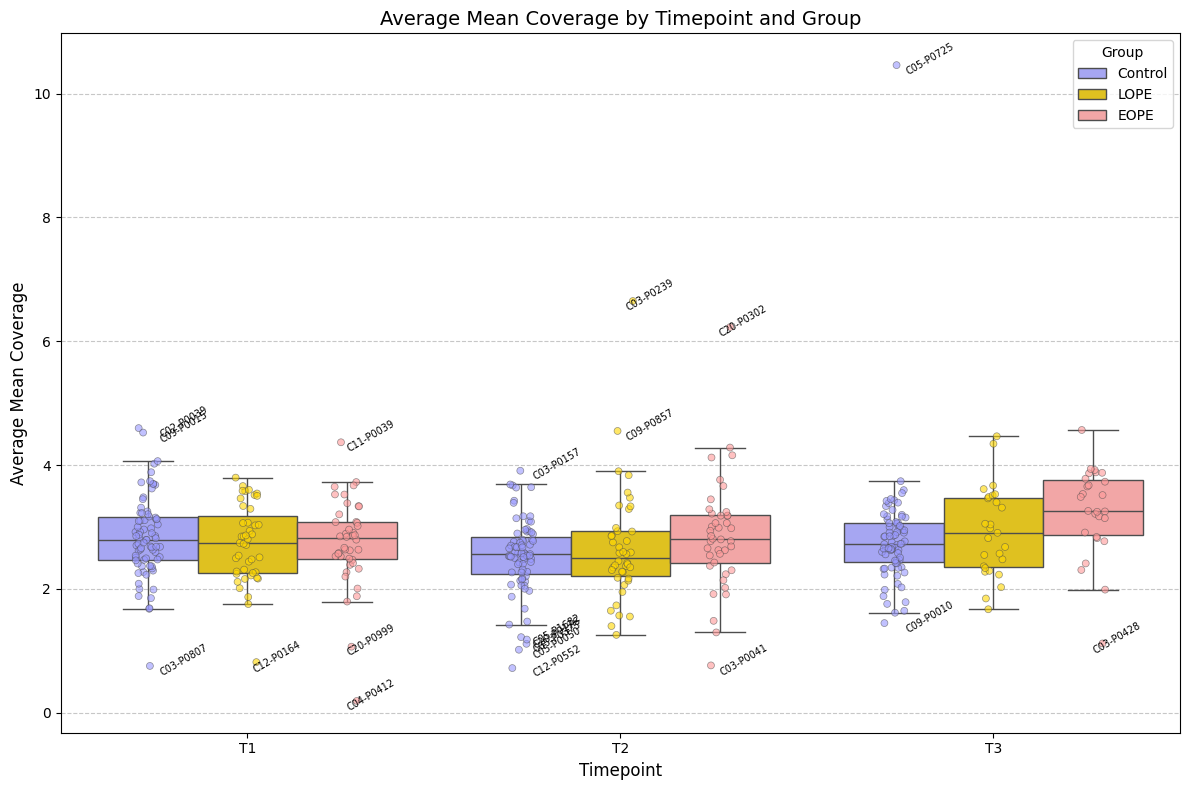

In [12]:
plot_results(result_all_runs, "Coverage")

In [ ]:
result_all_runs.to_csv("../../../output/results_feature_importance/RNAseq_statistics/all_runs_coverage_metrics.csv", index=False)

2.780396187896753

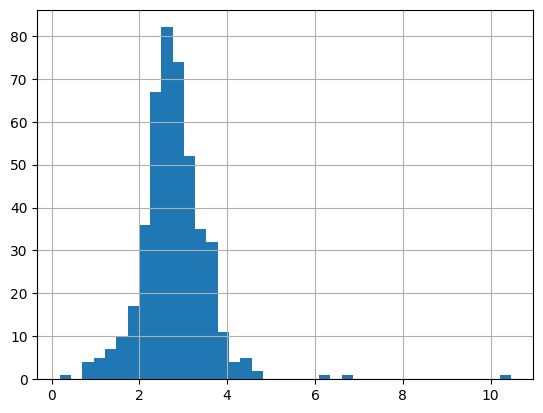

In [13]:
result_all_runs["Average Mean Coverage"].hist(bins=40)
result_all_runs["Average Mean Coverage"].mean()

In [41]:
# specific run
specific_run = "MOM-07" 
result_single_run = aggregate_runs_coverage(base_dir, process_all=False, specific_run=specific_run)

#result_single_run.to_csv(f"/path/to/output/{specific_run}_coverage.csv", index=False)
result_single_run = assign_group(dataframe=result_single_run, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
result_single_run

Processing runs: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


,Sample Base,Average Mean Coverage,Sample,Group
0,C02-P0013-T1,1.989173,"C02-P0013-T1_S9_L003, C02-P0013-T1_S9_L001, C0...",Control
1,C02-P0013-T2,2.565033,"C02-P0013-T2_S11_L001, C02-P0013-T2_S11_L002, ...",Control
2,C02-P0013-T3,2.645310,"C02-P0013-T3_S13_L001, C02-P0013-T3_S13_L004, ...",Control
3,C02-P0016-T1,3.461292,"C02-P0016-T1_S1_L001, C02-P0016-T1_S1_L004, C0...",LOPE
4,C02-P0016-T2,2.931993,"C02-P0016-T2_S4_L001, C02-P0016-T2_S4_L003, C0...",LOPE
5,C02-P0016-T3,3.612099,"C02-P0016-T3_S7_L004, C02-P0016-T3_S7_L001, C0...",LOPE
6,C03-P0037-T1,3.680126,"C03-P0037-T1_S5_L003, C03-P0037-T1_S5_L002, C0...",Control
7,C03-P0037-T2,3.389454,"C03-P0037-T2_S8_L004, C03-P0037-T2_S8_L001, C0...",Control
8,C03-P0037-T3,2.951421,"C03-P0037-T3_S10_L001, C03-P0037-T3_S10_L002, ...",Control
9,C03-P0045-T1,2.702879,"C03-P0045-T1_S18_L001, C03-P0045-T1_S18_L003, ...",Control


### Sequencing depth

Sequence depth reflects the mean number of unique reads (non-duplicated) that cover each nucleotide in the transcriptome.

**Formula:**

Sequencing Depth = Total Sequences × Deduplicate Percentage 

- Total Sequences: Total number of reads sequenced.

- Deduplicate Percentage: Proportion of reads identified as non-duplicates.

**Good vs. Bad Data:**

- Good: A high sequence depth indicates that the data is rich in unique reads, providing reliable coverage across the transcriptome.

- Bad: A low sequence depth or a high duplication rate (>50%) suggests poor library complexity, which may lead to less reliable data.

In [42]:
# Para procesar todos los RUNS en un directorio base
result_all_runs = aggregate_runs_sequencing_depth(base_dir=base_dir, all_runs=True)
result_all_runs = assign_group(dataframe=result_all_runs, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)

result_all_runs

Processing Runs: 100%|██████████| 28/28 [00:19<00:00,  1.40it/s]


,Sample Base,Average Mean Sequencing Depth,Sample,Group
0,C02-P0013-T1,3.262982e+06,"C02-P0013-T1_S9_L003, C02-P0013-T1_S9_L004, C0...",Control
1,C02-P0013-T2,2.654243e+06,"C02-P0013-T2_S11_L001, C02-P0013-T2_S11_L003, ...",Control
2,C02-P0013-T3,3.595453e+06,"C02-P0013-T3_S13_L001, C02-P0013-T3_S13_L004, ...",Control
3,C02-P0016-T1,6.525795e+06,"C02-P0016-T1_S1_L001, C02-P0016-T1_S1_L004, C0...",LOPE
4,C02-P0016-T2,2.623380e+06,"C02-P0016-T2_S4_L001, C02-P0016-T2_S4_L003, C0...",LOPE
...,...,...,...,...
490,C21-P0890-T2,4.586565e+06,"C21-P0890-T2_S15_L001, C21-P0890-T2_S15_L003, ...",EOPE
491,C21-P0962-T1,3.667511e+06,"C21-P0962-T1_S17_L004, C21-P0962-T1_S17_L003, ...",EOPE
492,C21-P0962-T2,3.510254e+06,"C21-P0962-T2_S18_L002, C21-P0962-T2_S18_L003, ...",EOPE
493,C21-P1237-T1,3.321098e+06,"C21-P1237-T1_S8_L001, C21-P1237-T1_S8_L003, C2...",LOPE


/home/dferri/ipremom/model/v45/tg-cfrna-modeling-totrna/src/utils/RNAseq_utils/RNAseq_utils.py:133: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


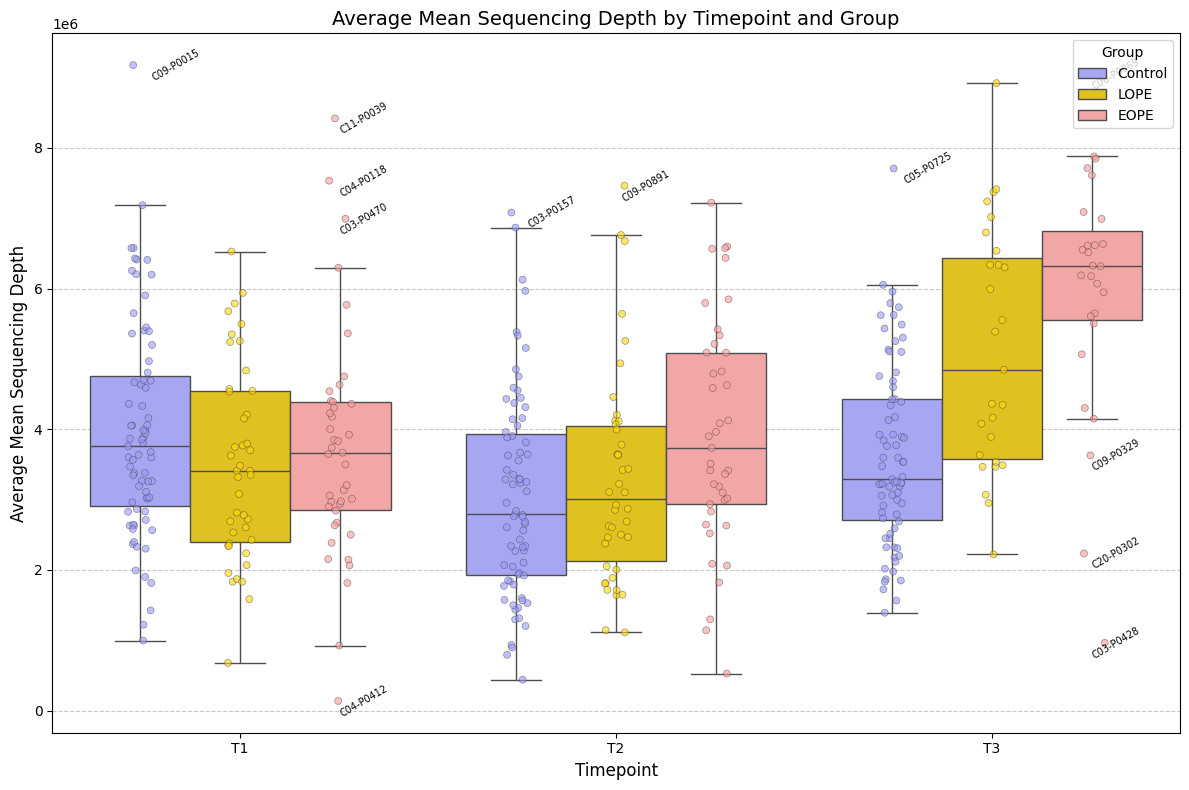

In [43]:
plot_results(result_all_runs, "Sequencing Depth")

In [ ]:
result_all_runs.to_csv("../../../output/results_feature_importance/RNAseq_statistics/all_runs_sequencing_depth_metrics.csv", index=False)

3811004.7817675667

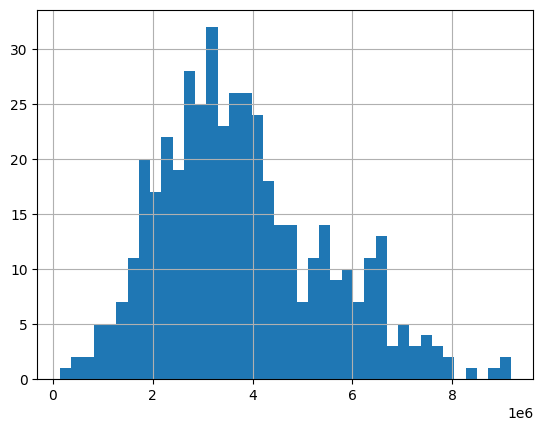

In [17]:
result_all_runs["Average Mean Sequencing Depth"].hist(bins=40)
result_all_runs["Average Mean Sequencing Depth"].mean()

In [44]:
# Para procesar un solo RUN
run = "MOM-12"
single_run_results = aggregate_runs_sequencing_depth(base_dir=base_dir, all_runs=False, run_dir=base_dir + run)
single_run_results = assign_group(dataframe=single_run_results, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
single_run_results

Processing Runs: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


,Sample Base,Average Mean Sequencing Depth,Sample,Group
0,C03-P0470-T1,6.990998e+06,"C03-P0470-T1_S12_L004, C03-P0470-T1_S12_L002, ...",EOPE
1,C03-P0470-T2,2.630940e+06,"C03-P0470-T2_S11_L002, C03-P0470-T2_S11_L004, ...",EOPE
2,C03-P0470-T3,5.645983e+06,"C03-P0470-T3_S10_L003, C03-P0470-T3_S10_L004, ...",EOPE
3,C05-P0166-T1,3.011551e+06,"C05-P0166-T1_S9_L001, C05-P0166-T1_S9_L002, C0...",Control
4,C05-P0166-T2,1.432537e+06,"C05-P0166-T2_S18_L004, C05-P0166-T2_S18_L003, ...",Control
5,C05-P0166-T3,2.590770e+06,"C05-P0166-T3_S17_L002, C05-P0166-T3_S17_L003, ...",Control
6,C12-P0210-T1,2.397000e+06,"C12-P0210-T1_S15_L002, C12-P0210-T1_S15_L003, ...",Control
7,C12-P0210-T2,2.684050e+06,"C12-P0210-T2_S14_L001, C12-P0210-T2_S14_L002, ...",Control
8,C12-P0210-T3,3.892261e+06,"C12-P0210-T3_S13_L001, C12-P0210-T3_S13_L003, ...",Control
9,C12-P0323-T1,2.843135e+06,"C12-P0323-T1_S7_L002, C12-P0323-T1_S7_L001, C1...",EOPE


### Number of reads

This metric evaluates the total number of reads normalized by the average read length. 

**Formula:**

Number of Reads = Total Sequences / Sequence Length

 
**Good vs. Bad Data:**

- Good: A high number of reads generally indicates adequate sequencing throughput, as more reads provide better representation of the transcriptome.

- Bad: A low number of reads might suggest poor sequencing efficiency or inadequate input material.


In [45]:
# all runs
result_all_runs = aggregate_runs_number_reads(base_dir, process_all=True)
result_all_runs = assign_group(dataframe=result_all_runs, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
result_all_runs

Processing runs: 100%|██████████| 28/28 [00:10<00:00,  2.66it/s]


,Sample Base,Average Mean Number Reads,Sample,Group
0,C02-P0013-T1,100885.25,"C02-P0013-T1_S9_L003, C02-P0013-T1_S9_L001, C0...",Control
1,C02-P0013-T2,130091.25,"C02-P0013-T2_S11_L001, C02-P0013-T2_S11_L002, ...",Control
2,C02-P0013-T3,134162.50,"C02-P0013-T3_S13_L001, C02-P0013-T3_S13_L004, ...",Control
3,C02-P0016-T1,175546.75,"C02-P0016-T1_S1_L001, C02-P0016-T1_S1_L004, C0...",LOPE
4,C02-P0016-T2,148702.25,"C02-P0016-T2_S4_L001, C02-P0016-T2_S4_L003, C0...",LOPE
...,...,...,...,...
490,C21-P0890-T2,174787.25,"C21-P0890-T2_S15_L002, C21-P0890-T2_S15_L001, ...",EOPE
491,C21-P0962-T1,152982.25,"C21-P0962-T1_S17_L003, C21-P0962-T1_S17_L001, ...",EOPE
492,C21-P0962-T2,136205.50,"C21-P0962-T2_S18_L002, C21-P0962-T2_S18_L003, ...",EOPE
493,C21-P1237-T1,125584.75,"C21-P1237-T1_S8_L001, C21-P1237-T1_S8_L003, C2...",LOPE


/home/dferri/ipremom/model/v45/tg-cfrna-modeling-totrna/src/utils/RNAseq_utils/RNAseq_utils.py:133: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


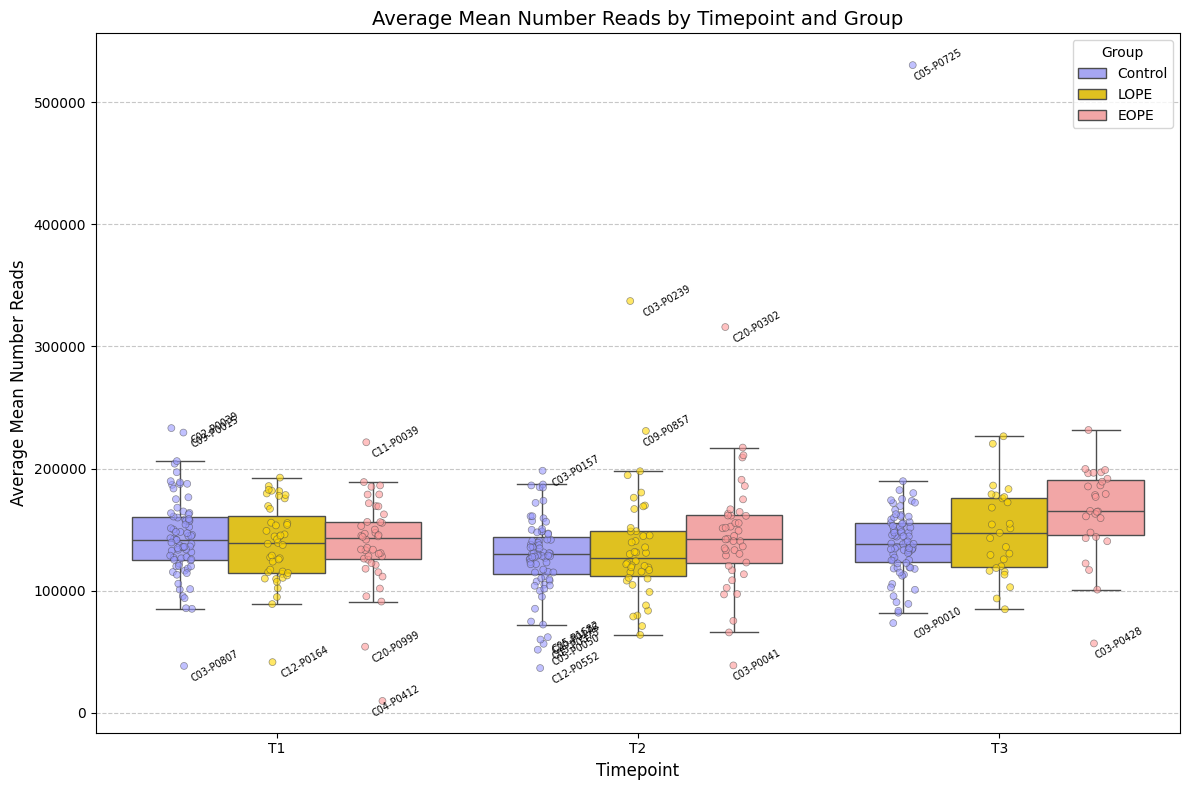

In [46]:
plot_results(result_all_runs, "Number Reads")

In [8]:
result_all_runs.to_csv("../../../output/results_feature_importance/RNAseq_statistics/all_runs_number_of_reads_metrics.csv", index=False)

141013.56991051455

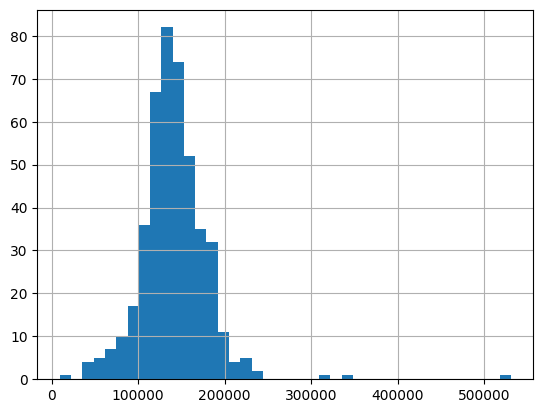

In [21]:
result_all_runs["Average Mean Number Reads"].hist(bins=40)
result_all_runs["Average Mean Number Reads"].mean()

In [47]:
# specific run
specific_run = "MOM-07" 
result_single_run = aggregate_runs_number_reads(base_dir, process_all=False, specific_run=specific_run)
result_single_run = assign_group(dataframe=result_single_run, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
result_single_run

Processing runs: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


,Sample Base,Average Mean Number Reads,Sample,Group
0,C02-P0013-T1,100885.25,"C02-P0013-T1_S9_L003, C02-P0013-T1_S9_L001, C0...",Control
1,C02-P0013-T2,130091.25,"C02-P0013-T2_S11_L001, C02-P0013-T2_S11_L002, ...",Control
2,C02-P0013-T3,134162.50,"C02-P0013-T3_S13_L001, C02-P0013-T3_S13_L004, ...",Control
3,C02-P0016-T1,175546.75,"C02-P0016-T1_S1_L001, C02-P0016-T1_S1_L004, C0...",LOPE
4,C02-P0016-T2,148702.25,"C02-P0016-T2_S4_L001, C02-P0016-T2_S4_L003, C0...",LOPE
5,C02-P0016-T3,183195.00,"C02-P0016-T3_S7_L004, C02-P0016-T3_S7_L001, C0...",LOPE
6,C03-P0037-T1,186645.25,"C03-P0037-T1_S5_L003, C03-P0037-T1_S5_L002, C0...",Control
7,C03-P0037-T2,171903.25,"C03-P0037-T2_S8_L004, C03-P0037-T2_S8_L001, C0...",Control
8,C03-P0037-T3,149687.50,"C03-P0037-T3_S10_L001, C03-P0037-T3_S10_L002, ...",Control
9,C03-P0045-T1,137082.25,"C03-P0045-T1_S18_L001, C03-P0045-T1_S18_L003, ...",Control


### Quality reads

The quality of sequencing reads indicates the probability of base-calling errors.

**Formula:**

Total Count = ∑( Counts per Quality Score ) 

Average Quality = ∑(Quality Score × Counts per Quality Score) / Total Count
​
- Counts: Number of reads at each quality score.

- Quality Scores: scores for each base position.


**Good vs. Bad Data:**

- Good: An average score >27 is generally considered high-quality, corresponding to a base-calling error rate of ≤0.2%.

- Bad: An average score <20 suggests poor-quality data, with a higher probability of sequencing errors of 1%.

In [48]:
# For all runs
result_all_runs = aggregate_runs_quality_reads(base_dir)
result_all_runs = assign_group(dataframe=result_all_runs, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
result_all_runs

Processing runs: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]


,Sample Base,Average Mean Quality,Sample,Group
0,C02-P0013-T1,32.999506,"C02-P0013-T1_S9_L003, C02-P0013-T1_S9_L004, C0...",Control
1,C02-P0013-T2,33.423495,"C02-P0013-T2_S11_L001, C02-P0013-T2_S11_L003, ...",Control
2,C02-P0013-T3,33.248598,"C02-P0013-T3_S13_L001, C02-P0013-T3_S13_L004, ...",Control
3,C02-P0016-T1,33.281898,"C02-P0016-T1_S1_L001, C02-P0016-T1_S1_L004, C0...",LOPE
4,C02-P0016-T2,33.469252,"C02-P0016-T2_S4_L001, C02-P0016-T2_S4_L003, C0...",LOPE
...,...,...,...,...
490,C21-P0890-T2,33.480892,"C21-P0890-T2_S15_L001, C21-P0890-T2_S15_L003, ...",EOPE
491,C21-P0962-T1,33.449771,"C21-P0962-T1_S17_L004, C21-P0962-T1_S17_L003, ...",EOPE
492,C21-P0962-T2,33.448818,"C21-P0962-T2_S18_L002, C21-P0962-T2_S18_L003, ...",EOPE
493,C21-P1237-T1,33.604470,"C21-P1237-T1_S8_L001, C21-P1237-T1_S8_L003, C2...",LOPE


/home/dferri/ipremom/model/v45/tg-cfrna-modeling-totrna/src/utils/RNAseq_utils/RNAseq_utils.py:133: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


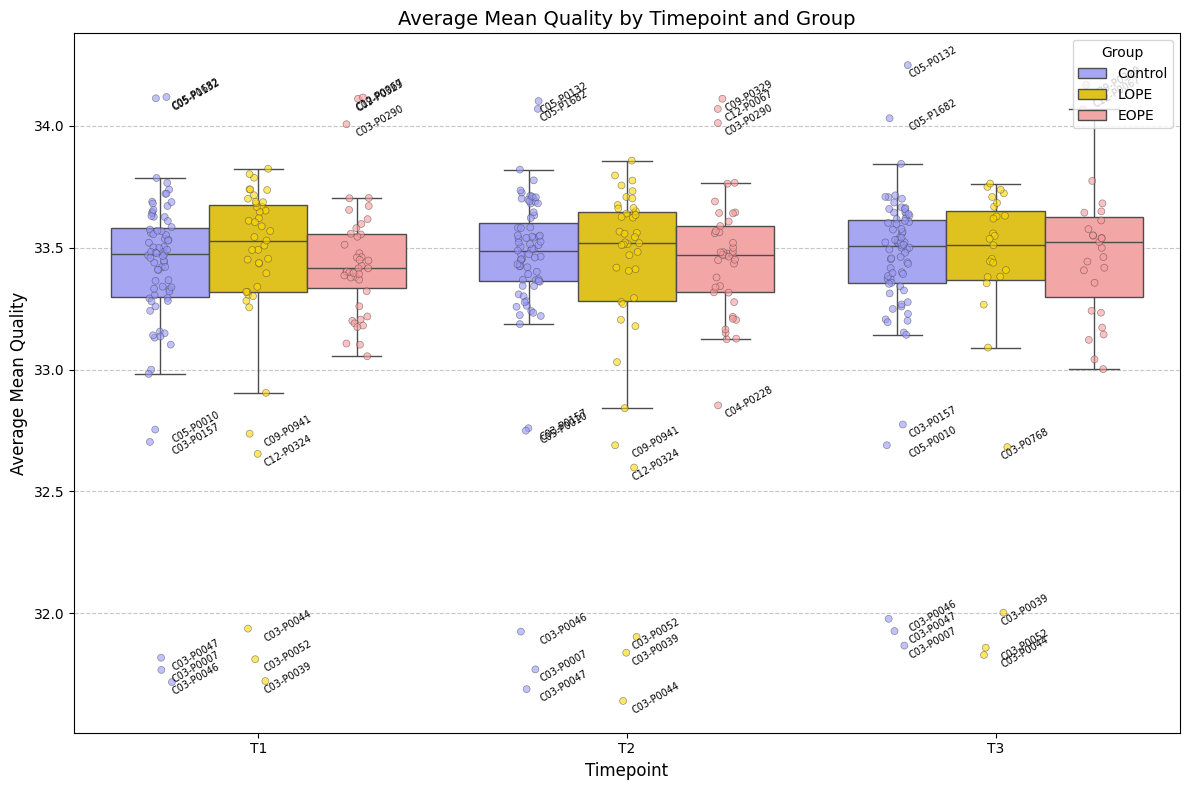

In [49]:
plot_results(result_all_runs, "Quality")

In [10]:
result_all_runs.to_csv("../../../output/results_feature_importance/RNAseq_statistics/all_runs_quality_reads_metrics.csv", index=False)

33.411427222034106

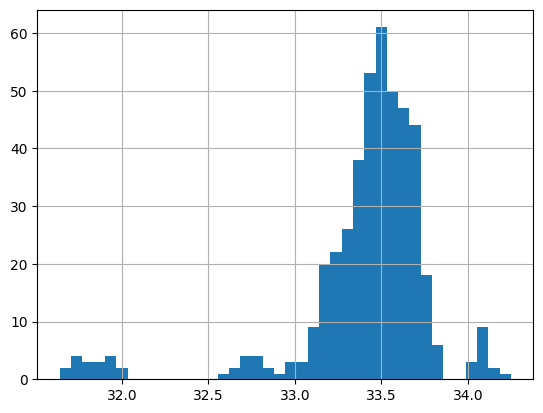

In [26]:
# to get all samples average
result_all_runs["Average Mean Quality"].hist(bins=40)
result_all_runs["Average Mean Quality"].mean()

In [50]:
# For a single run
single_run_df = aggregate_runs_quality_reads(base_dir, process_all=False, specific_run="MOM-10")
single_run_df = assign_group(dataframe=single_run_df, 
                               lope_samples=lope_samples, 
                               eope_samples=eope_samples, 
                               control_samples=control_samples)
single_run_df

Processing runs: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


,Sample Base,Average Mean Quality,Sample,Group
0,C02-P0039-T1,33.502490,"C02-P0039-T1_S2_L001, C02-P0039-T1_S2_L002, C0...",Control
1,C02-P0039-T2,33.502944,"C02-P0039-T2_S5_L002, C02-P0039-T2_S5_L003, C0...",Control
2,C02-P0039-T3,33.416172,"C02-P0039-T3_S7_L004, C02-P0039-T3_S7_L002, C0...",Control
3,C03-P0428-T1,33.401235,"C03-P0428-T1_S9_L004, C03-P0428-T1_S9_L001, C0...",EOPE
4,C03-P0428-T2,33.483139,"C03-P0428-T2_S11_L001, C03-P0428-T2_S11_L002, ...",EOPE
5,C03-P0428-T3,33.499149,"C03-P0428-T3_S13_L003, C03-P0428-T3_S13_L004, ...",EOPE
6,C03-P0592-T1,33.415271,"C03-P0592-T1_S14_L001, C03-P0592-T1_S14_L004, ...",EOPE
7,C03-P0592-T2,33.468300,"C03-P0592-T2_S16_L003, C03-P0592-T2_S16_L004, ...",EOPE
8,C05-P0050-T1,33.472795,"C05-P0050-T1_S8_L003, C05-P0050-T1_S8_L001, C0...",Control
9,C05-P0050-T2,33.491052,"C05-P0050-T2_S10_L004, C05-P0050-T2_S10_L001, ...",Control
